# Multiclass Classification

#### Using tensorflow 2.0 at the back end and Keras functional API  

In [12]:
import tensorflow as tf 
from tensorflow import keras
import cv2

### Load the fashion mnist dataset using the keras.datasets

In [2]:
fashion_mnist = keras.datasets.fashion_mnist    # Object
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()    #Function

4423680/4422102 [==============================] - 5s 1us/step


#### Shape and data type of the datasets
- 60,000 images of size 28x28 in grey scale

In [5]:
print(X_train.shape)
X_train.dtype

(60000, 28, 28)


dtype('uint8')

### Normalizing images. 
- Since gradient descent is used scaling of input features is required.
- Using MLP's for image classification. Normalization helps remove noise and helps for faster convergence 

In [7]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

### Class names of this dataset

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

### View sample from the dataset
- Plot images


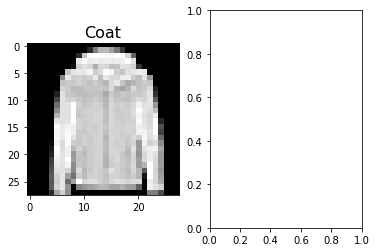

In [53]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[0], cmap='gray', vmin=0, vmax=1)
ax[0].set_title(class_names[y_train[0]], fontsize = 16) 
plt.show()